# Keras - 02
---

- 기사 분류 데이터(`reuters`)를 이용하여 Keras 실습을 진행해본다.

In [15]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [16]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


- 데이터를 준비한다. Vectorize 작업을 수행한다.

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

- 훈련 데이터와 테스트 데이터를 벡터로 변환한다. 

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- 라벨 데이터를 카테고리 데이터로 전환한다.

In [19]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

- 모델을 구성해본다.

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [21]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.7764 - accuracy: 0.4873 - val_loss: 1.8337 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5331 - accuracy: 0.6823 - val_loss: 1.3927 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1672 - accuracy: 0.7468 - val_loss: 1.1874 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9506 - accuracy: 0.7954 - val_loss: 1.0874 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7861 - accuracy: 0.8320 - val_loss: 1.0686 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6562 - accuracy: 0.8591 - val_loss: 0.9691 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5501 - accuracy: 0.8849 - val_loss: 0.9434 - val_accuracy: 0.7940
Epoch 8/20
16

- 시각화를 해본다.

In [24]:
import matplotlib.pyplot as plt

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

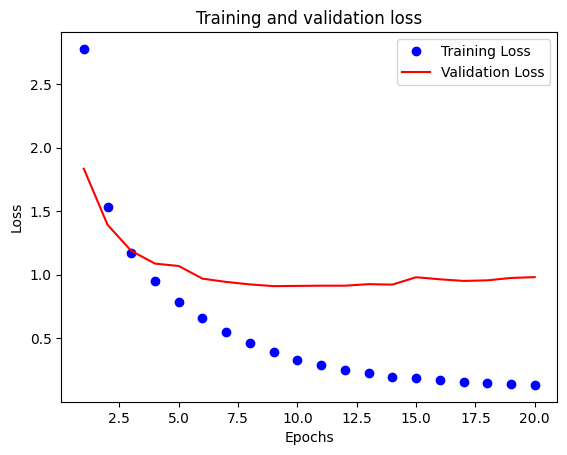

In [26]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

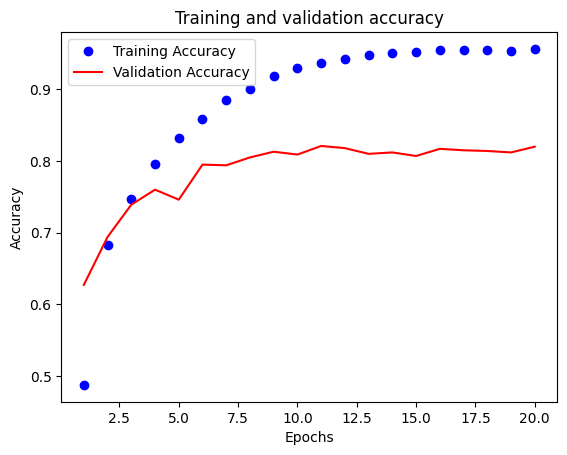

In [27]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- 검증 된 결과로 다시 학습을 해본다.

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 1s 22ms/step - loss: 2.5708 - accuracy: 0.5132 - val_loss: 1.7707 - val_accuracy: 0.6160
Epoch 2/10
16/16 [==============================] - 0s 14ms/step - loss: 1.4912 - accuracy: 0.6785 - val_loss: 1.3579 - val_accuracy: 0.7070
Epoch 3/10
16/16 [==============================] - 0s 14ms/step - loss: 1.1576 - accuracy: 0.7553 - val_loss: 1.1944 - val_accuracy: 0.7440
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.9474 - accuracy: 0.8003 - val_loss: 1.0842 - val_accuracy: 0.7710
Epoch 5/10
16/16 [==============================] - 0s 14ms/step - loss: 0.7824 - accuracy: 0.8355 - val_loss: 1.0102 - val_accuracy: 0.7790
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6496 - accuracy: 0.8589 - val_loss: 0.9578 - val_accuracy: 0.7960
Epoch 7/10
16/16 [==============================] - 0s 13ms/step - loss: 0.5357 - accuracy: 0.8882 - val_loss: 0.9528 - val_accuracy: 0.7940
Epoch 8/10
16